('/home/misgana/remote/AutoDA/notebooks/../../AutoData/cifar10/BOHB/WideResNet/best_config_BOHB_cifar10_1.json', '/home/misgana/remote/AutoDA/notebooks/../../AutoData/cifar10/BOHB/WideResNet/best_config_standard_BOHB_WideResNet_cifar10_1.json')
/home/misgana/remote/AutoDA/notebooks/../../AutoData/cifar10/BOHB/WideResNet/best_config_BOHB_cifar10_1.json
/home/misgana/remote/AutoDA/notebooks/../../AutoData/cifar10/BOHB/WideResNet/best_config_standard_BOHB_WideResNet_cifar10_1.json


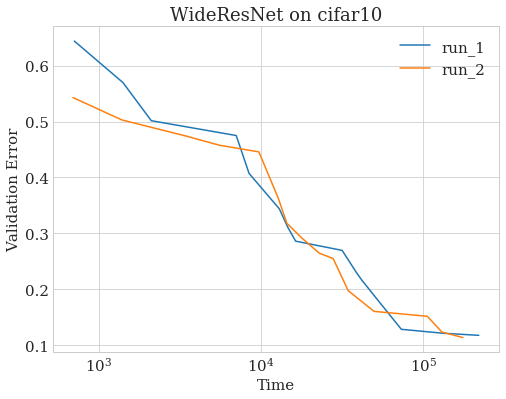

In [2]:
import sys
import os
import pandas as pd
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)
#from autoda.data_augmentation import ImageAugmentation




sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
import pandas as pd
from itertools import product
from glob import glob
from collections import OrderedDict
from itertools import product

from matplotlib.transforms import Bbox
from matplotlib.ticker import FormatStrFormatter

path = path_join(abspath("."), "..", "..", "AutoData")
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

# benchmarks = ["AlexNet","ResNet", "WideResNet"]
benchmark = "WideResNet"
optimizers = ("BOHB",)
dataset = "cifar10"
marker="best_config"
markers = (
    "best_config", 
    #"no_augment",
    #"default"
)
base_path = path_join(path, dataset, "BOHB", benchmark)
#benchmark="WideResNet"
filenames = tuple(sorted(glob("{base_path}/{marker}*{dataset}*.json".format(base_path=base_path, marker=marker,dataset=dataset))))
print(filenames)
runs= [1, 2, 3, 4, 5]
i=0
for filename in filenames:
    with open(filename, "r") as f:
        print(filename)
        json_content = json.load(f)
        losses=json_content["best_config_trajectory"]["losses"]
        time=json_content["best_config_trajectory"]["times_finished"]
        plt.plot(time, losses, label="run_" + str(runs[i]))
        plt.xlabel("Time")
        plt.ylabel("Validation Error")
        plt.xscale('log')
        i+=1
plt.grid(True)
plt.legend()
plt.title("{benchmark} on {dataset}".format(benchmark=benchmark, dataset=dataset))

plt.show()



/home/misgana/remote/AutoDA/notebooks/../../AutoData/cifar10/hyperband/AlexNet


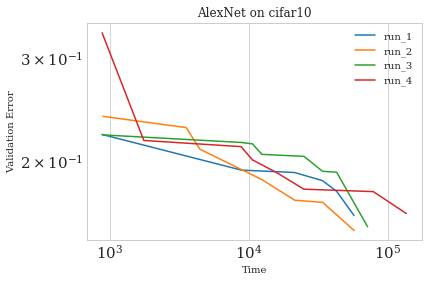

In [3]:
# benchmarks = ["AlexNet","ResNet", "WideResNet"]
benchmark = "AlexNet"
optimizer = "hyperband"
dataset = "cifar10"
marker="best_config"
markers = (
    "best_config", 
    #"no_augment",
    #"default"
)
base_path = path_join(path, dataset, optimizer, benchmark)
print(base_path)
filenames = tuple(sorted(glob("{base_path}/{marker}*{dataset}*.json".format(base_path=base_path, marker=marker,dataset=dataset))))
runs= [1, 2, 3, 4, 5]
i=0

for filename in filenames:
    with open(filename, "r") as f:
        json_content = json.load(f)
        losses=json_content["best_config_trajectory"]["losses"]
        time=json_content["best_config_trajectory"]["times_finished"]
        plt.plot(time, losses, label="run_" + str(runs[i]))
        plt.xlabel("Time")
        plt.ylabel("Validation Error")
        plt.yscale('log')
        plt.xscale('log')
        i+=1
plt.grid(True)
plt.legend()
plt.title("{benchmark} on {dataset}".format(benchmark=benchmark, dataset=dataset))
plt.show()


Learning Curve of WideResNet with no augmentation to check for convergence

('/home/misgana/AutoDA/notebooks/../../AutoData/cifar10/default/AlexNet/default_cifar10_pickle.json',)
/home/misgana/AutoDA/notebooks/../../AutoData/cifar10/default/AlexNet/default_cifar10_pickle.json


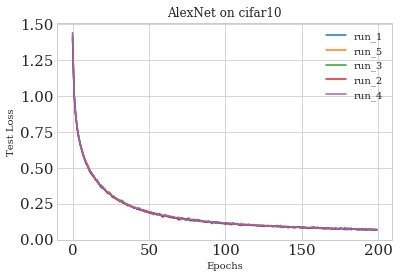

In [11]:
dataset = "cifar10"
marker="default"
benchmark="AlexNet"
path = path_join(abspath("."), "..", "..", "AutoData")

# TODO: plot learning curve of all benchmarks in subplots
base_path = path_join(path, dataset, marker, benchmark)

filenames = tuple(sorted(glob("{base_path}/{marker}*{dataset}*_pickle.json".format(base_path=base_path, marker=marker,dataset=dataset))))
print(filenames)
runs= [1, 2, 3, 4, 5]
i=0
for filename in filenames:
    with open(filename, "r") as f:
        print(filename)
        json_content = json.load(f)
        for cnt, i in enumerate(json_content):
            losses=json_content[i]
            epochs=[cnt+1]
            plt.plot(losses, label="run_" + i)
            plt.xlabel("Epochs")
            plt.ylabel("Test Loss")
            #plt.xscale('log')
plt.grid(True)
plt.legend()
plt.title("{benchmark} on {dataset}".format(benchmark=benchmark, dataset=dataset))

plt.show()

FILLED TRAJECTORIES

In [ ]:
import numpy as np 
import sys
import os
import pandas as pd
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
sys.path.insert(0, PARENT_DIR)

from itertools import product
from glob import glob
from collections import OrderedDict
from itertools import product
from scipy import stats

from matplotlib.transforms import Bbox
from matplotlib.ticker import FormatStrFormatter
sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


path = path_join(abspath("."), "..", "..", "AutoData")
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg



def fill_trajectory(performance_list, time_list, replace_nan=np.NaN):
    frame_dict = OrderedDict()
    counter = np.arange(0, len(performance_list))
    for p, t, c in zip(performance_list, time_list, counter):
        if len(p) != len(t):
            raise ValueError("(%d) Array length mismatch: %d != %d" %
                             (c, len(p), len(t)))
        frame_dict[str(c)] = pd.Series(data=p, index=t)

    merged = pd.DataFrame(frame_dict)
    merged = merged.ffill()

    performance = merged.get_values()
    time_ = merged.index.values

    performance[np.isnan(performance)] = replace_nan

    if not np.isfinite(performance).all():
        raise ValueError("\nCould not merge lists, because \n"
                         "\t(a) one list is empty?\n"
                         "\t(b) the lists do not start with the same times and"
                         " replace_nan is not set?\n"
                         "\t(c) any other reason.")

    return performance, time_

def read_data(dataset, benchmark="AlexNet", marker="best_config", optimizer=None):
    assert optimizer is not None
    base_path = path_join(path, dataset, optimizer, benchmark)
    #base_path = path_join(path, dataset, "random", benchmark)
    filenames = glob("{base_path}/{marker}*{dataset}*.json".format(base_path=base_path, marker=marker, dataset=dataset))
    #print(filenames)
    
    def read_files(filenames):
        data = {}
        losses = []
        time = []
        for filename in filenames:
            with open(filename, "r") as f:
                json_content = json.load(f)
                losses.append(json_content["best_config_trajectory"]["losses"])
                time.append(json_content["best_config_trajectory"]["times_finished"])
                data["losses"] = losses
                data["time"] = time
                #print(json_content)
            #print(data)
        return losses, time
    losses, time = read_files(filenames=filenames)
    return losses, time


markers=['x', '^', 'D', 'o']

colors = ["C0", "C1", "C2", "C3", "C4"]

labels = [ "BOHB", "Hyperband"]


optimizers = ("BOHB", "hyperband")
for index, optimizer in enumerate(optimizers): 
    print(labels[index])
    losses, runtimes = read_data(dataset="cifar100", benchmark="AlexNet", optimizer=optimizer)
    print(losses, runtimes)

    te, time = fill_trajectory(losses, runtimes, replace_nan=1)

    plt.plot(time, np.mean(te.T, axis=0), label=labels[index],
         marker=markers[index], color=colors[index], markevery=5, linewidth=3, markersize=15)
    plt.fill_between(time, np.mean(te.T, axis=0) + 2 * stats.sem(te.T, axis=0),
                                 np.mean(te.T, axis=0) - 2 * stats.sem(te.T, axis=0),
                                 color=colors[index], alpha=0.2)
plt.legend()
plt.show()
